In [1]:
import numpy as np

# 读取Label_record.npy文件
label_record = np.load('Label_record.npy')

# 读取Mask_record.npy文件
mask_record = np.load('Mask_record.npy')

print("Label_record:", label_record.shape)
print("Mask_record:", mask_record.shape)

Label_record: (3715,)
Mask_record: (3715, 513)


In [9]:
from classify import EN_LABEL_LIST
all_record = [[] for _ in range(len(EN_LABEL_LIST))]
for label_idx,mask in zip(label_record,mask_record):
    all_record[label_idx].append(mask)


for i in range(len(all_record)):
    all_record[i] = np.array(all_record[i]) # type: ignore

print("all_record:", len(all_record))
for label, record in zip(EN_LABEL_LIST, all_record):
    print(label, record.shape)

all_record: 4
Background (1313, 513)
Knock (1185, 513)
Climb (799, 513)
Construction (418, 513)


all_record中的每个类别的shape含义为 (样本数，频率数)
通过计算每个类别的在各频率的平均值，得到每个类别的频率特征

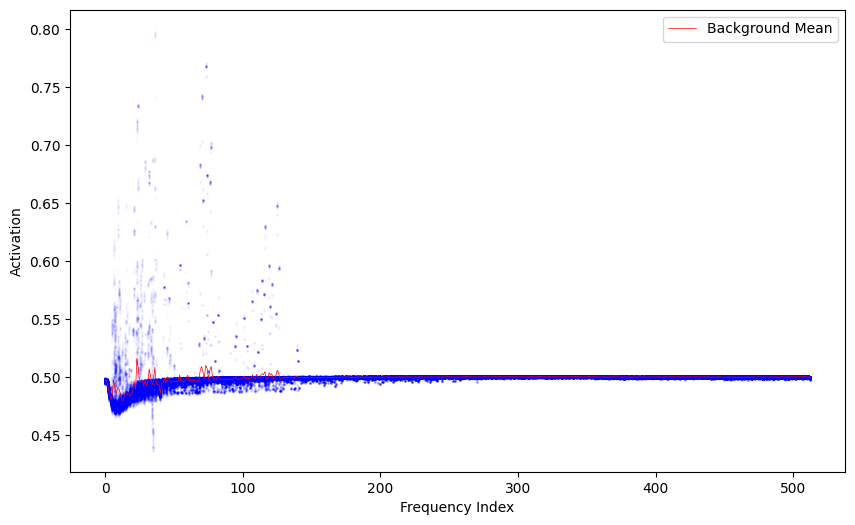

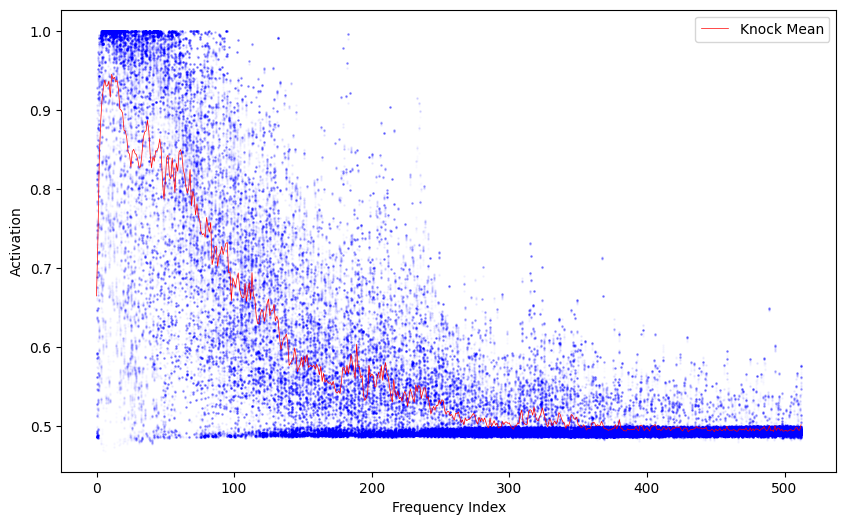

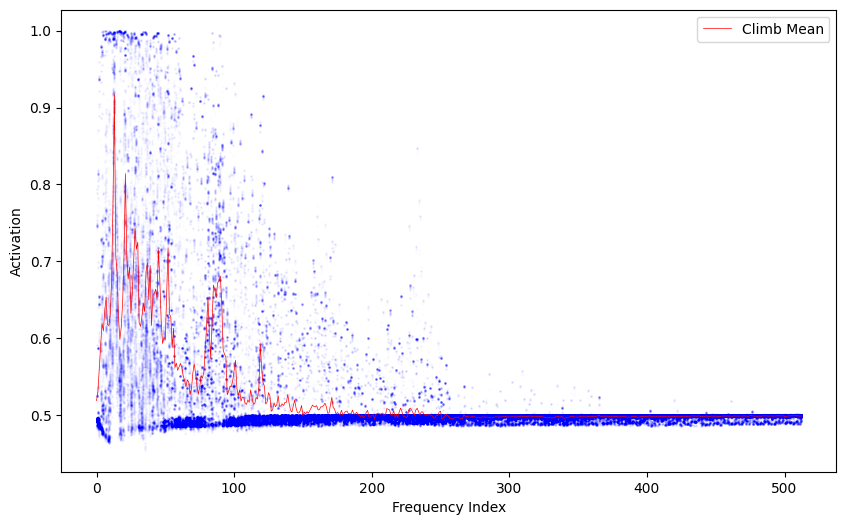

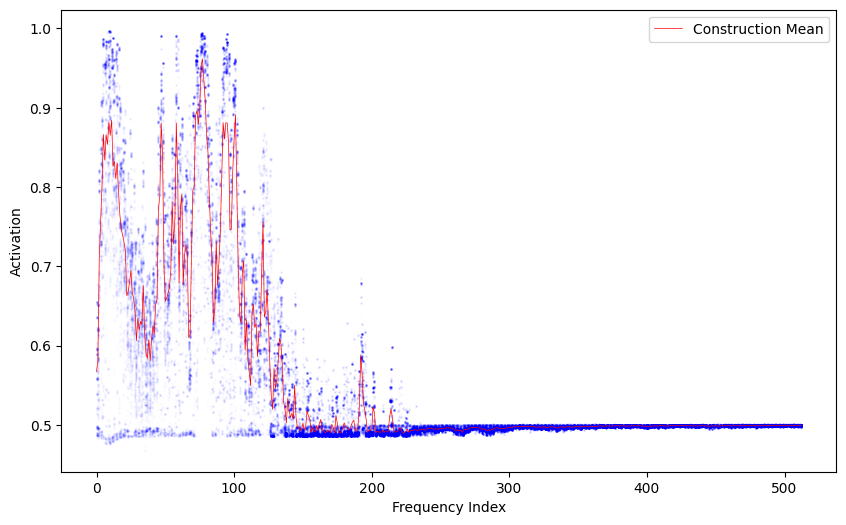

In [23]:
import matplotlib.pyplot as plt

# 计算每个类别在各频率的平均值
frequency_features = [np.mean(record, axis=0) for record in all_record]


# 为每个类别单独绘制频率响应散点图
for i, record in enumerate(all_record):
    plt.figure(figsize=(10, 6))
    for sample in record:
        plt.scatter(range(len(sample)), sample, s=1, color='blue', alpha=0.01)
    plt.plot(frequency_features[i], label=f'{EN_LABEL_LIST[i]} Mean', linewidth=0.5, color='red')
    
    plt.xlabel('Frequency Index')
    plt.ylabel('Activation')
    plt.legend()
    plt.show()


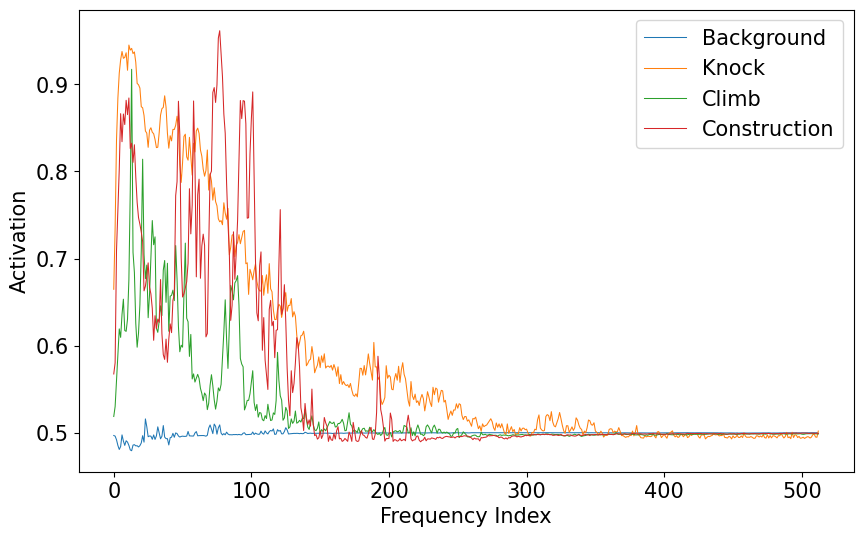

In [ ]:
# 绘制总的频率响应曲线
plt.figure(figsize=(10, 6))

for i, features in enumerate(frequency_features):
    plt.plot(features, label=EN_LABEL_LIST[i], linewidth=0.75)

plt.xlabel('Frequency Index')
plt.ylabel('Activation')
plt.legend()
# 加大字体
plt.rcParams.update({'font.size': 15})
plt.show()